In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('recession_dataset_var.csv',index_col='Date')
recession_variable = pd.read_csv('recession_dataset.csv', usecols=['Date','Recession dates'], index_col='Date')

In [4]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 1948-01-01 to 2025-01-01
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GDP_diff                925 non-null    float64
 1   GDP rate                925 non-null    float64
 2   Unemployment            925 non-null    float64
 3   Ind.Prod. index_diff    925 non-null    float64
 4   DJI_diff                925 non-null    float64
 5   SP500_diff              925 non-null    float64
 6   T-bill_diff             925 non-null    float64
 7   Housing starts          925 non-null    float64
 8   House price index_diff  925 non-null    float64
 9   Consumer loans_diff     925 non-null    float64
 10  Mortgage loans_diff     925 non-null    float64
 11  CPI-U_diff              925 non-null    float64
 12  Inflation rate          925 non-null    float64
 13  World GDP growth        925 non-null    float64
 14  Date_copy               915 non

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy,Data_Type
Date,,,,,,,,,,,,,,,,
2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032,NaN,Forecast
2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787,NaN,Forecast
2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,4.566269,16.990189,0.402775,0.040757,0.026002,NaN,Forecast
2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,5.109165,16.208063,0.445212,0.039858,0.025969,NaN,Forecast
2025-01-01,29.124193,0.594674,4.144975,0.146870,98.842415,15.246520,-0.025512,1410.939895,0.608150,4.789319,15.552411,0.502114,0.039055,0.026529,NaN,Forecast


In [5]:
recession_variable.info()
recession_variable.head()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 1948-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Recession dates  915 non-null    int64
dtypes: int64(1)
memory usage: 14.3+ KB


,Recession dates
Date,
1948-01-01,0
1948-02-01,0
1948-03-01,0
1948-04-01,0
1948-05-01,0


# Data preparation

## Create lagged variables

We need to create lagged variables for each variable. Then we'll use these lagged variables for modelling. But before that we need to reverrt the differences.

In [6]:
df = df.reset_index()
recession_variable.reset_index()

,Date,Recession dates
0,1948-01-01,0
1,1948-02-01,0
2,1948-03-01,0
3,1948-04-01,0
4,1948-05-01,0
...,...,...
910,2023-11-01,0
911,2023-12-01,0
912,2024-01-01,0
913,2024-02-01,0


### Combining dataframe

In [7]:
combined_df = df.merge(recession_variable, on='Date', how='left')

In [8]:
combined_df.head(12)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy,Data_Type,Recession dates
0,1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484,1948-01-01,Historical,0.0
1,1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484,1948-02-01,Historical,0.0
2,1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484,1948-03-01,Historical,0.0
3,1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484,1948-04-01,Historical,0.0
4,1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484,1948-05-01,Historical,0.0
5,1948-06-01,0.000,6.8,3.6,0.2957,4.67,0.67,0.00,1362.0,0.0,0.1265,0.1350,0.2,0.09545,0.0484,1948-06-01,Historical,0.0
6,1948-07-01,13.080,2.3,3.6,0.2957,-4.00,-0.40,0.00,1362.0,0.0,0.0938,0.1131,0.3,0.09910,0.0484,1948-07-01,Historical,0.0
7,1948-08-01,0.000,2.3,3.9,0.0806,-5.28,-0.48,0.06,1362.0,0.0,0.0724,0.0878,0.1,0.08889,0.0484,1948-08-01,Historical,0.0
8,1948-09-01,0.000,2.3,3.8,-0.1075,-1.44,-0.18,0.03,1362.0,0.0,0.0721,0.0881,0.0,0.06522,0.0484,1948-09-01,Historical,0.0
9,1948-10-01,2.594,0.5,3.7,-0.0538,4.86,0.43,0.03,1362.0,0.0,0.0721,0.0873,-0.1,0.06087,0.0484,1948-10-01,Historical,0.0


Recessions typically don't happen overnight. Economic indicators often show signs of trouble months or even quarters before a recession officially begins. However there are so-called leading indicatiors, specifically those related to stock markets, or consumer indexes -- these indicators are more fluctuative and tend to react more quickly than the others. Some other indicators are more laggy, like unemplyment. So it's a question of balance between quick (1-3 months) and sloewr (3-5 months) features. So this suggests that longer lag periods would be preferrable and I think that 3 months would be a good point to start. Maybe later that will be changed to 4 months or even 5.

In [9]:
predictor_cols = [col for col in combined_df.columns if col not in ['Date', 'Date_copy', 'Data_Type', 'Recession dates']]
lags = 3 # [3,4, 5] we'll have lags for 3 months, maybe later should switch to 4.
for col in predictor_cols:
    combined_df[f'{col}_lag3m'] = combined_df[col].shift(3)

In [10]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [11]:
combined_df.head(12)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy,Data_Type,Recession dates,GDP_diff_lag3m,GDP rate_lag3m,Unemployment_lag3m,Ind.Prod. index_diff_lag3m,DJI_diff_lag3m,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m
0,1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484,1948-01-01,Historical,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484,1948-02-01,Historical,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484,1948-03-01,Historical,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484,1948-04-01,Historical,0.0,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484
4,1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484,1948-05-01,Historical,0.0,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484
5,1948-06-01,0.000,6.8,3.6,0.2957,4.67,0.67,0.00,1362.0,0.0,0.1265,0.1350,0.2,0.09545,0.0484,1948-06-01,Historical,0.0,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484
6,1948-07-01,13.080,2.3,3.6,0.2957,-4.00,-0.40,0.00,1362.0,0.0,0.0938,0.1131,0.3,0.09910,0.0484,1948-07-01,Historical,0.0,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484
7,1948-08-01,0.000,2.3,3.9,0.0806,-5.28,-0.48,0.06,1362.0,0.0,0.0724,0.0878,0.1,0.08889,0.0484,1948-08-01,Historical,0.0,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484
8,1948-09-01,0.000,2.3,3.8,-0.1075,-1.44,-0.18,0.03,1362.0,0.0,0.0721,0.0881,0.0,0.06522,0.0484,1948-09-01,Historical,0.0,0.000,6.8,3.6,0.2957,4.67,0.67,0.00,1362.0,0.0,0.1265,0.1350,0.2,0.09545,0.0484
9,1948-10-01,2.594,0.5,3.7,-0.0538,4.86,0.43,0.03,1362.0,0.0,0.0721,0.0873,-0.1,0.06087,0.0484,1948-10-01,Historical,0.0,13.080,2.3,3.6,0.2957,-4.00,-0.40,0.00,1362.0,0.0,0.0938,0.1131,0.3,0.09910,0.0484


We have created lagged variables in the dataset for 3-months lag period. Now we need to handle the NAs and drop unnecessary columns before we move to the modelling.

### Handling missing variables, NAs

In [12]:
# separate historical from forecast

historical_df = combined_df[combined_df['Data_Type'] == 'Historical'].copy()
forecast_df = combined_df[combined_df['Data_Type'] == 'Forecast'].copy()

In [13]:
forecast_df.head(10)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy,Data_Type,Recession dates,GDP_diff_lag3m,GDP rate_lag3m,Unemployment_lag3m,Ind.Prod. index_diff_lag3m,DJI_diff_lag3m,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m
915,2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392,NaN,Forecast,NaN,79.497000,1.400000,3.700000,0.136200,816.020000,119.440000,-0.020000,1376.000000,1.148757,1.382100,21.447900,1.671000,0.030910,0.030000
916,2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612,NaN,Forecast,NaN,0.000000,1.400000,3.900000,-0.087700,956.570000,207.470000,0.020000,1546.000000,3.074212,8.447600,19.897100,1.909000,0.031530,0.030000
917,2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626,NaN,Forecast,NaN,0.000000,1.400000,3.800000,0.103800,385.000000,158.610000,0.000000,1299.000000,3.807592,7.173500,18.311700,2.006000,0.034770,0.030000
918,2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115,NaN,Forecast,NaN,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392
919,2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906,NaN,Forecast,NaN,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612
920,2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032,NaN,Forecast,NaN,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626
921,2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787,NaN,Forecast,NaN,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115
922,2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,4.566269,16.990189,0.402775,0.040757,0.026002,NaN,Forecast,NaN,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906
923,2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,5.109165,16.208063,0.445212,0.039858,0.025969,NaN,Forecast,NaN,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032
924,2025-01-01,29.124193,0.594674,4.144975,0.146870,98.842415,15.246520,-0.025512,1410.939895,0.608150,4.789319,15.552411,0.502114,0.039055,0.026529,NaN,Forecast,NaN,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787


Drop rows with NAs in hitorical data.

We drop the rows where any of the lagged features or the target variable is NA. This ensures that we only train on data where all required information is available.

In [14]:
lagged_feature_cols = [f'{col}_lag{lags}m' for col in predictor_cols]

historical_df = historical_df.dropna(subset=['Recession dates'] + lagged_feature_cols)
historical_df = historical_df.reset_index(drop=True)

### Prepare forecast data

As for the forecasted data -- the lagged features are based on historical data.

Since we have shifted the data, some of the lagged features in forecast_df have NAs. 

- For lag 1, the first forecasted period will have lagged features from the last historical period.
- For lag 2, the first 2 forecasted periods will have some lagged features with NAs
- For lag 3 --first 3 forecasted periods will have some lagged features with NAs.

In [15]:
# See how many periods have NAs in lagged features
forecast_df[lagged_feature_cols].isnull().sum()

GDP_diff_lag3m                  0
GDP rate_lag3m                  0
Unemployment_lag3m              0
Ind.Prod. index_diff_lag3m      0
DJI_diff_lag3m                  0
SP500_diff_lag3m                0
T-bill_diff_lag3m               0
Housing starts_lag3m            0
House price index_diff_lag3m    0
Consumer loans_diff_lag3m       0
Mortgage loans_diff_lag3m       0
CPI-U_diff_lag3m                0
Inflation rate_lag3m            0
World GDP growth_lag3m          0
dtype: int64

In [16]:
forecast_df = forecast_df.dropna(subset=lagged_feature_cols)
forecast_df = forecast_df.reset_index(drop=True)

In [17]:
# reset display options to default
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_columns')

In [18]:
historical_df.tail()

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,...,DJI_diff_lag3m,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m
907,2023-11-01,0.000,3.4,3.7,0.4712,1385.01,201.08,-0.07,1510.0,-28.069057,...,103.46,-81.84,0.05,1305.0,1.373000,7.2494,29.4202,1.335,0.03665,0.028
908,2023-12-01,0.000,3.4,3.7,0.6985,2243.43,224.99,-0.03,1568.0,-0.596951,...,-561.77,-17.14,0.02,1363.0,0.898000,6.1403,13.8674,0.763,0.03700,0.028
909,2024-01-01,79.497,1.4,3.7,0.1362,816.02,119.44,-0.02,1376.0,1.148757,...,-999.40,-150.12,0.02,1365.0,0.536000,1.8893,7.1747,-0.118,0.03241,0.028
910,2024-02-01,0.000,1.4,3.9,-0.0877,956.57,207.47,0.02,1546.0,3.074212,...,1385.01,201.08,-0.07,1510.0,-28.069057,5.2771,13.0826,-0.620,0.03137,0.028
911,2024-03-01,0.000,1.4,3.8,0.1038,385.00,158.61,0.00,1299.0,3.807592,...,2243.43,224.99,-0.03,1568.0,-0.596951,-4.5506,13.1777,-0.305,0.03352,0.028


In [19]:
forecast_df.head()

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,...,DJI_diff_lag3m,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m
0,2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,...,816.020000,119.440000,-0.020000,1376.000000,1.148757,1.382100,21.447900,1.671000,0.030910,0.030000
1,2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,...,956.570000,207.470000,0.020000,1546.000000,3.074212,8.447600,19.897100,1.909000,0.031530,0.030000
2,2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,...,385.000000,158.610000,0.000000,1299.000000,3.807592,7.173500,18.311700,2.006000,0.034770,0.030000
3,2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,...,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392
4,2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,...,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612


# Modelling

## Splitting the data

In [20]:
historical_df[lagged_feature_cols].columns

Index(['GDP_diff_lag3m', 'GDP rate_lag3m', 'Unemployment_lag3m',
       'Ind.Prod. index_diff_lag3m', 'DJI_diff_lag3m', 'SP500_diff_lag3m',
       'T-bill_diff_lag3m', 'Housing starts_lag3m',
       'House price index_diff_lag3m', 'Consumer loans_diff_lag3m',
       'Mortgage loans_diff_lag3m', 'CPI-U_diff_lag3m', 'Inflation rate_lag3m',
       'World GDP growth_lag3m'],
      dtype='object')

In [21]:
# We want training data: up to 2006 and testing -- everything after that so that we captute couple of recessions

train_data = historical_df[historical_df['Date'] <= '2006-12-31']
X_train = train_data[lagged_feature_cols]
y_train = train_data['Recession dates']

test_data = historical_df[historical_df['Date'] > '2006-12-31']
X_test = test_data[lagged_feature_cols]
y_test = test_data['Recession dates']

## Logistic regression

Highly correlated feature pairs:
DJI_diff_lag3m and SP500_diff_lag3m: 0.90


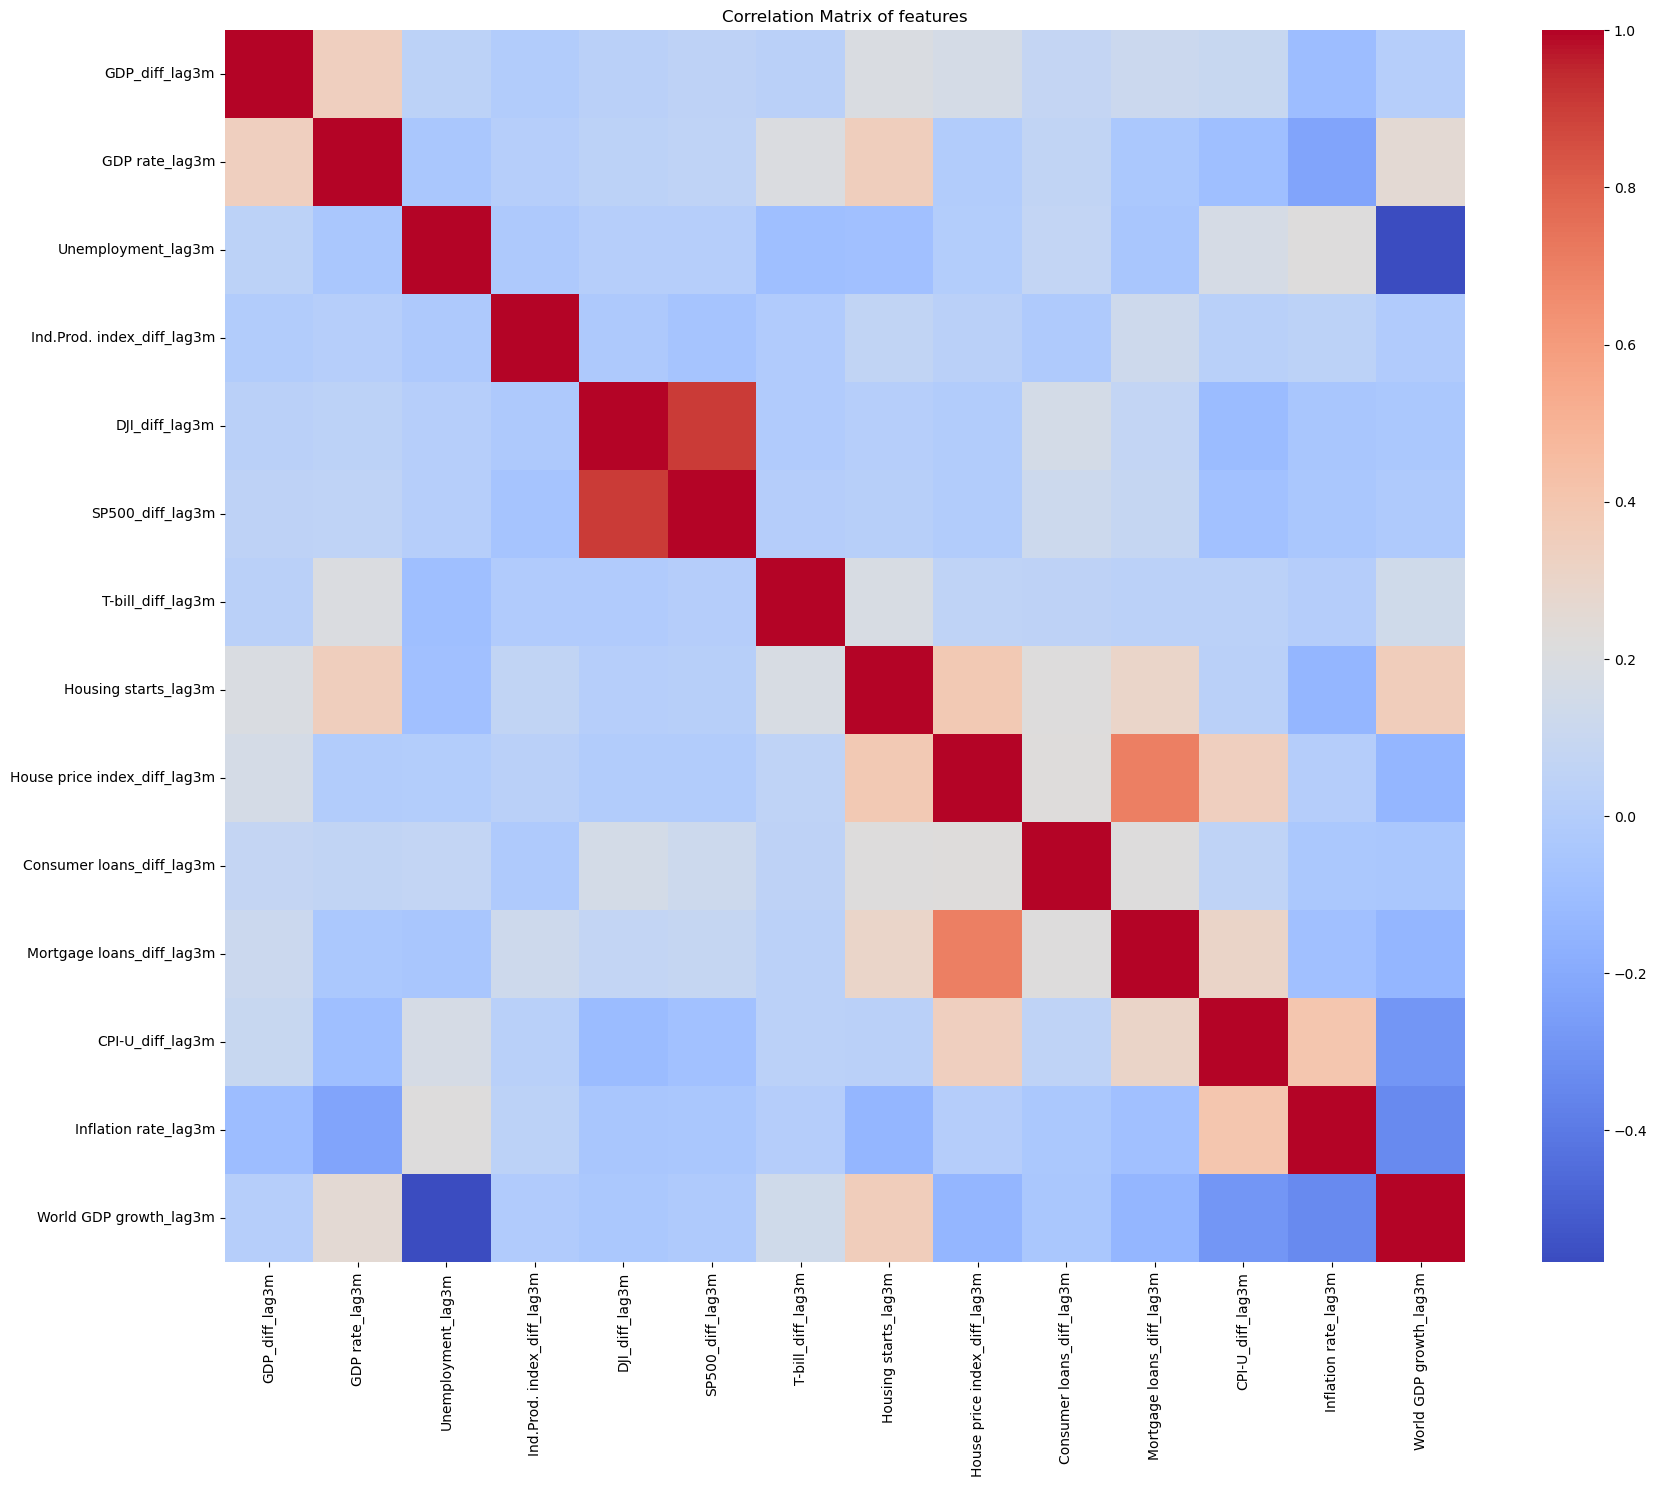

In [22]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of features')

threshold = 0.8 # threshold for high correlation


high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Highly correlated feature pairs:")
for feat1, feat2 in high_corr_features:
    print(f"{feat1} and {feat2}: {correlation_matrix.loc[feat1, feat2]:.2f}")
    
plt.show();    

We cannot drop all those columns that we identified as redundunt during EDA step, because of logistic regression, that can't have enough data to train.

In [23]:
# we need to drop one -- DOW or SnP
# columns_to_drop = ['GDP_diff_lag3m','Ind.Prod. index_diff_lag3m','DJI_diff_lag3m','House price index_diff_lag3m','SP500_diff_lag3m','Consumer loans_diff_lag3m']
columns_to_drop = ['DJI_diff_lag3m']

# for logreg the training set would be specific, the other models handle multicollinearity
X_train_logreg = X_train.drop(columns=columns_to_drop)
X_test_logreg = X_test.drop(columns=columns_to_drop)

### SMOTE balancing

In [24]:
# initialize SMOTE, apply it to the training data, train:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_logreg, y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [27]:
m_logreg = LogisticRegression(class_weight='balanced', max_iter=1000, C=0.009)

tscv = TimeSeriesSplit(n_splits=5) # Time series cross-validation
scores = cross_val_score(m_logreg, X_train_logreg, y_train, cv=tscv, scoring='roc_auc')# We evaluate model using cross-validation

print(f'Cross-validation ROC AUC scores: {scores}')
print(f'Mean ROC AUC score: {scores.mean()}\n\n')

m_logreg.fit(X_train_resampled, y_train_resampled)

# ---------------------------------------------------
# >>>>integrating SMOTE within cross-validation<<<<

# from imblearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=42)),
#     ('logreg', LogisticRegression(max_iter=1000))
# ])

# tscv = TimeSeriesSplit(n_splits=5)

# scores = cross_val_score(pipeline, X_train_logreg, y_train, cv=tscv, scoring='roc_auc')

# print(f'Cross-validation ROC AUC scores: {scores}')
# print(f'Mean ROC AUC score: {scores.mean()}')

# pipeline.fit(X_train_logreg, y_train)

Cross-validation ROC AUC scores: [0.8542024  0.87860082 0.9569378  0.84747706 0.76605505]
Mean ROC AUC score: 0.8606546267104571




LogisticRegression(C=0.009, class_weight='balanced', max_iter=1000)

We use TimeSeriesSplit to perform cross-validation that respects the temporal order of data.

The class_weight='balanced' parameter helps address class imbalance by adjusting weights inversely proportional to class frequencies.

The ROC AUC (5 folds with mean = 0.847) scores are demostrating that the model is performing well in distinguishing between recession and non-recession periods and is rather stable overe folds.

There's some variation, but the scores are consistently hhigh, which means the models works well across different periods.

### Making predictions

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [29]:
y_pred = m_logreg.predict(X_test_logreg) # predict 0 or 1

y_pred_prob = m_logreg.predict_proba(X_test_logreg)[:, 1] # Make proba. predictions for class 1

In [30]:
print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74       187
         1.0       0.18      0.80      0.29        20

    accuracy                           0.62       207
   macro avg       0.57      0.70      0.51       207
weighted avg       0.89      0.62      0.70       207

Confusion matrix:
[[112  75]
 [  4  16]]
ROC AUC score: 0.7660


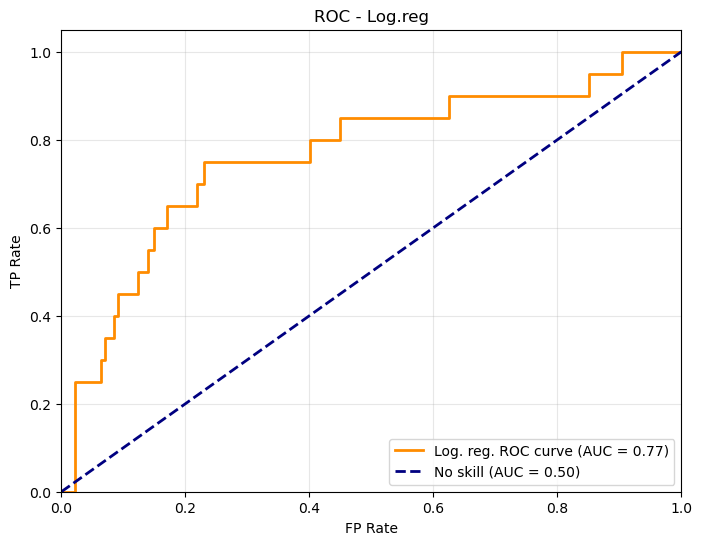

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # calculate FP Rate & TP Rate

# roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Log. reg. ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No skill (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC - Log.reg')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show();

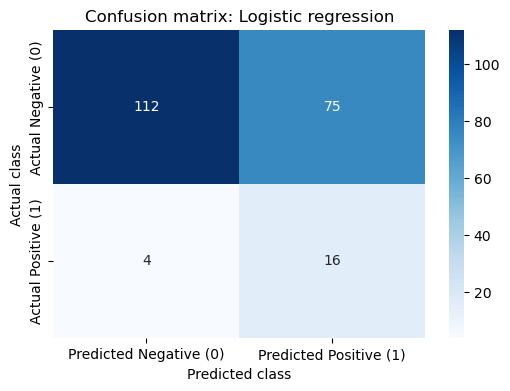

In [32]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix: Logistic regression')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show();

We will use the forecasted data to try to predict the probability of the recession in the next 10 months:

In [33]:
#make it similiar to the historical data used int the train/test steps
forecast_features_logreg = forecast_df[lagged_feature_cols].drop(columns=columns_to_drop)

In [34]:
# forecast_features_scaled = scaler.transform(forecast_features_logreg)
forecast_pred_prob = m_logreg.predict_proba(forecast_features_logreg)[:, 1]
forecast_df['Recession_Probability'] = forecast_pred_prob

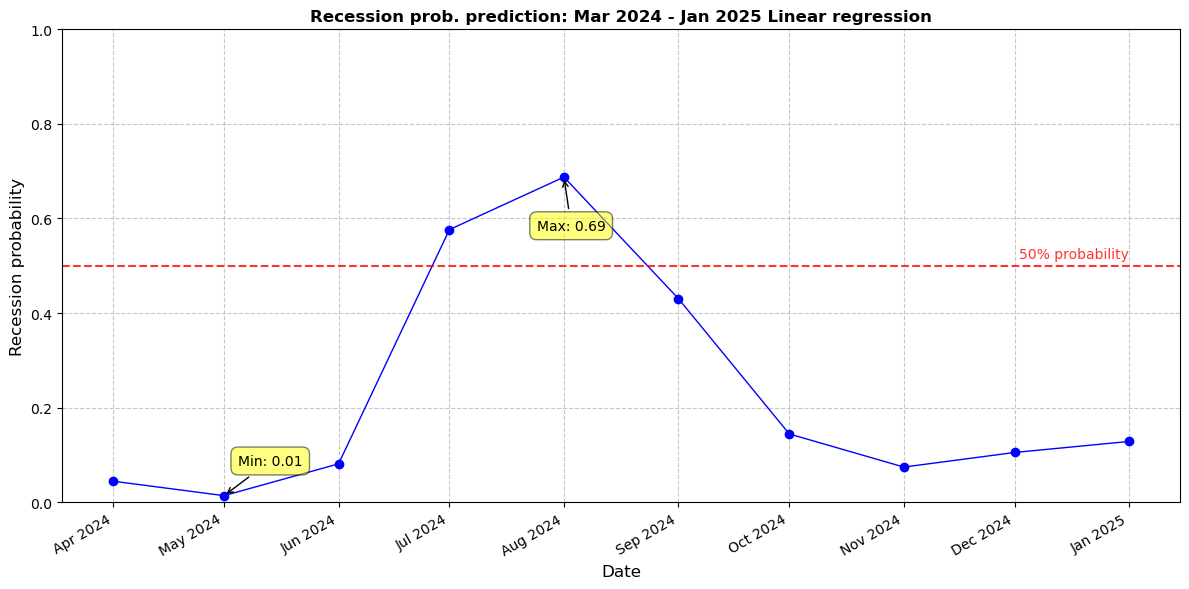

In [35]:
import matplotlib.dates as mdates

forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(forecast_df['Date'], forecast_df['Recession_Probability'], color='blue', linewidth=1, marker='o')
ax.set_title('Recession prob. prediction: Mar 2024 - Jan 2025 Linear regression', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Recession probability', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.8) #  <<--- line at 0.5 probability
ax.text(forecast_df['Date'].iloc[-1], 0.51, '50% probability', va='bottom', ha='right', color='r', alpha=0.8)
ax.set_ylim(0, 1)

max_prob = forecast_df['Recession_Probability'].max()
min_prob = forecast_df['Recession_Probability'].min()
max_date = forecast_df.loc[forecast_df['Recession_Probability'] == max_prob, 'Date'].iloc[0]
min_date = forecast_df.loc[forecast_df['Recession_Probability'] == min_prob, 'Date'].iloc[0]

ax.annotate(f'Max: {max_prob:.2f}', xy=(max_date, max_prob), xytext=(30, -30),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax.annotate(f'Min: {min_prob:.2f}', xy=(min_date, min_prob), xytext=(10, 30),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('LR_prediction.png')
plt.show();

### Post analysis. Feature importance

model coefficients to understand: which variables contribute most to the predictions.

In [36]:
feature_importance = pd.DataFrame({
    'Feature': X_train_logreg.columns,
    'Coeff.': m_logreg.coef_[0]
}).sort_values(by='Coeff.', ascending=False)

print(feature_importance)

                         Feature    Coeff.
10              CPI-U_diff_lag3m  0.146581
7   House price index_diff_lag3m  0.060724
3     Ind.Prod. index_diff_lag3m  0.043636
11          Inflation rate_lag3m  0.023825
12        World GDP growth_lag3m -0.002211
6           Housing starts_lag3m -0.003165
0                 GDP_diff_lag3m -0.010257
4               SP500_diff_lag3m -0.016878
8      Consumer loans_diff_lag3m -0.025599
9      Mortgage loans_diff_lag3m -0.065872
5              T-bill_diff_lag3m -0.080219
2             Unemployment_lag3m -0.227534
1                 GDP rate_lag3m -0.369928


Positive coefficieant indicate that **higher values** of the feature increase the probability of a recession.

Negative coefficients suggest the opposite. 

But it requires understanding of economical theory.

Most important factors are Consumer price index (Urban), Inflation rate, then go a considerably lower but still important House price, Industrial index and World GDP (that were labled as redundant in correlation matrix).

### Test with threshold

Let's see how precision and recall change with different thresholds. Maybe we can find a more balanced value.

In [37]:
thresholds = np.arange(0.0, 1.1, 0.1)

In [38]:
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    print(f"Threshold: {threshold}")

    print("Classification report:")
    print(classification_report(y_test, y_pred_threshold))

    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred_threshold))
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-" * 40)

Threshold: 0.0
Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       187
         1.0       0.10      1.00      0.18        20

    accuracy                           0.10       207
   macro avg       0.05      0.50      0.09       207
weighted avg       0.01      0.10      0.02       207

Confusion matrix:
[[  0 187]
 [  0  20]]
ROC AUC Score: 0.7660
----------------------------------------
Threshold: 0.1
Classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.26      0.41       187
         1.0       0.11      0.90      0.20        20

    accuracy                           0.32       207
   macro avg       0.54      0.58      0.30       207
weighted avg       0.88      0.32      0.39       207

Confusion matrix:
[[ 48 139]
 [  2  18]]
ROC AUC Score: 0.7660
----------------------------------------
Threshold: 0.2
Classification report:
              precision 

In [39]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score

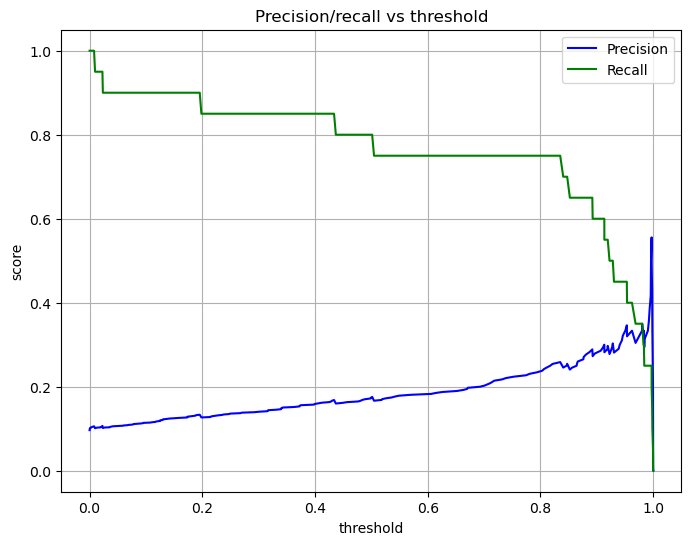

In [40]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precision[:-1], label="Precision", color='b')
plt.plot(thresholds_pr, recall[:-1], label="Recall", color='g')
plt.xlabel("threshold")
plt.ylabel("score")
plt.title("Precision/recall vs threshold")
plt.legend(loc="best")
plt.grid()
plt.savefig('logreg_threshold_test.png')
plt.show();

As threshold goes up, the recall goes down and precision increases. If we want to capture most of recessions (true and false) we can chose lower threshold. And if we want to be certain about recession, that it is true, we should go with higher threshold. 

There's an intersection at ~0.97 threshold. It can be a balance trade-off b/w P and R. But according to the Classification reports, the model at this threshold will be capturinf about 40% of al recessions with over 80% of them identified incorrectly.

So 0.5-0.6 still seems to be a good value for thresold.

### Conclusion

**Intro:** 
/some text on metrics/

When evaluating the performance of a predictive model -- specifically if we're talking about classification tasks with imbalanced classes like here (for imbalances some metrics can be misleading), about economic recessions -- it’s important to use multiple eval. metrics. No single metric can capture all aspects of model performanc.Relying on just one might will provide incomplete / misleading picture. And theres' one thing we need to keep in mind: it's much worse to miss a recession than to falsley predict one.

But Logistic regression may not capture complex nonlinear relationships between predictors and the target variable. If the data is not linearly separable, logistic regression might struggle to differentiate between classes, even with class balancing. Besides, even after balancing, the model may find it difficult to learn patterns associated with the minority class due to overlapping features.

**that's why we need several mertrics:**
- ROC AUC score -- it evaluates model regardless of the chosen classification threshold. High ROC AUC, closer to 1 indicates strong capability in distinguishing b/w classes. More high-level metric maybe.
- Precision --  proportion of positive predictions (classes) that are indeed correct.
- Sensitivity or recall -- the percentage of actual positive results that were identified correctly. maybe this one is more important, considering the specifics. IMHO it's more important not to miss a recession, than to falsely predict one.
- F1 -- is a metric that demonstrates balance b/w previous 2 metrics.
- Confusion matrix.


**with threshold 0.5:**

- TN = 112, the model predicted successfully 112 non-recessions out of 187.
- FP = 75 incorrectly predicted recessions. That's a lot
- FN = 4 missed actual recessions
- TP = 16 correctly predicted 12 recession periods

For non-recession periods (0):

- Precision: 0.97. 97% correctly predicted non recesions.
- Recall 0.6:  60% correctly identified non-recession periods
- F1: 0.74 - harmonic mean of precision and recall


For class 1 (recession periods):

- Precision: 0.18: out of all periods predicted as recession, only 18% were correct.
- Recall 0.8: the model correctly identified 80% of actual recession periods.
- F1: 0.29 -- lowe performance due to the trade-off between precision and recall.


Overal metrics:

- Accuracy of 0.62: model correctly predicts 62% of all periods
- ROC AUC 0.7660 indicates moderate overall model performance. It tells about model ability to destinguish between classes 1 & 0. Which considerably higher than flipping a coin.
-------------------

There are many False positive predictions - 75 falsely identified as recession periods. That is a lot. And 4 actual recessions were misssed. Out of 20 only 16 recessions were identified.

We can try other threshold values or fine-tune model, but generally we can say that as a baseline model it demonstrates barely moderate result. 

The fine-tuning of the model gave almost no result, the only parameter with positive impact is inverse regularization strength -- C=0.009

But maybe other models can perform better.

**To sum up:** 

The logistic regression , our baseline model, indicates that the peak of probability of the recession was in July and August, then the probability goes down. While this aligns well with the talks and news, sentiments that were there in media and social networks -- I think the peak of expectation or fear of a recession being pronounced was just in these months -- we have to admit that the model is not that great and keep in mind that the prediction is made on the VAR generated data. So we should take the results with huge grain of salt.

## Random forest

For this and following models we'll be using complete X datasets, with Dow Jones variable, since the models can handle these correlated variables.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [43]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=55,
    min_samples_split=15,
    min_samples_leaf=30
)
rf_model.fit(X_train_resampled, y_train_resampled)

y_test_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_rf = (y_test_prob_rf >= 0.5).astype(int)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

In [44]:
y_test_prob_rf = rf_model.predict_proba(X_test)[:, 1] # get pred. probs for the positive class

auc_score = roc_auc_score(y_test, y_test_prob_rf) # get ROC-AUC score
print(f"Random Forest ROC AUC Score: {auc_score:.4f}")

cm = confusion_matrix(y_test, y_test_pred_rf)
print("Confusion matrix:\n", cm)

print(classification_report(y_test, y_test_pred_rf))

Random Forest ROC AUC Score: 0.8086
Confusion matrix:
 [[164  23]
 [  7  13]]
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       187
         1.0       0.36      0.65      0.46        20

    accuracy                           0.86       207
   macro avg       0.66      0.76      0.69       207
weighted avg       0.90      0.86      0.87       207



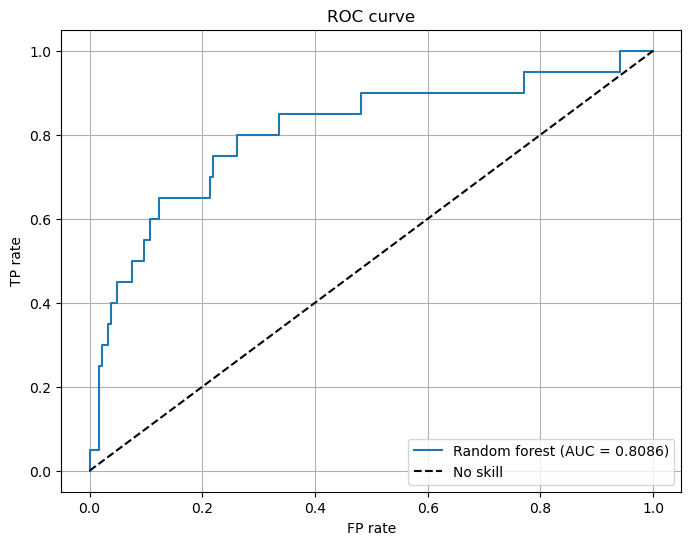

In [45]:
# compute FP Rate and TP-Rate
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random forest (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No skill')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

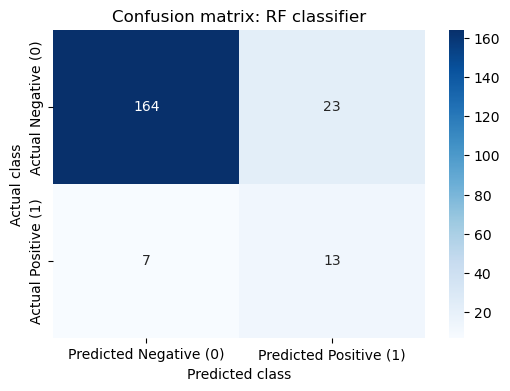

In [46]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

cm_df = pd.DataFrame(cm_rf, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix: RF classifier')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show();

**Confusion matrix analysis:**

RF Classifier CM:

- TN 164 non-recession periods that were correctly identified.
- FP: 23 non-rec periods incorrectly predicted as recessions.
- FN: 7 recess. periods incorrectly predicted as non-recessions
- TP: 13 rec. periods correctly identified.

**RF performance:**

- Class 0,1 precision: 0.96/0.36. The model is correct 96% of time when it comes to prediction of non-recessions. When it is recession, model is correct 36% of the time.
- Class 0,1 recall: 0.88/0.65. The model correctly identifies 88% of actual non-recession periods and 65% of actual recessions.
- Class 0,1 F1-score: 0.92/0.46. F1 shows the model is more reliable at predicting non-recessions and recessions as well. But still not great enough (36% for class 1).
- Accuracy: 0.86 -- RF is correct 86% of the times it makes forecasts. That's good.

Specificity = 164/(187) = 0.877 vs 0.598 in LogReg. It means the models is great at finding non-recessions -- it identidies 88% of N-R periods

ROC AUC = 0.8086 is solid especially considering that imbalanceness.

### Make predictions on forcasted data

In [47]:
forecast_features = forecast_df[lagged_feature_cols] #make it similiar to the historical data used int the train/test steps

In [48]:
forecast_pred_prob = rf_model.predict_proba(forecast_features)[:, 1]

forecast_df['Recession_Probability'] = forecast_pred_prob # add the predictions to dataframe

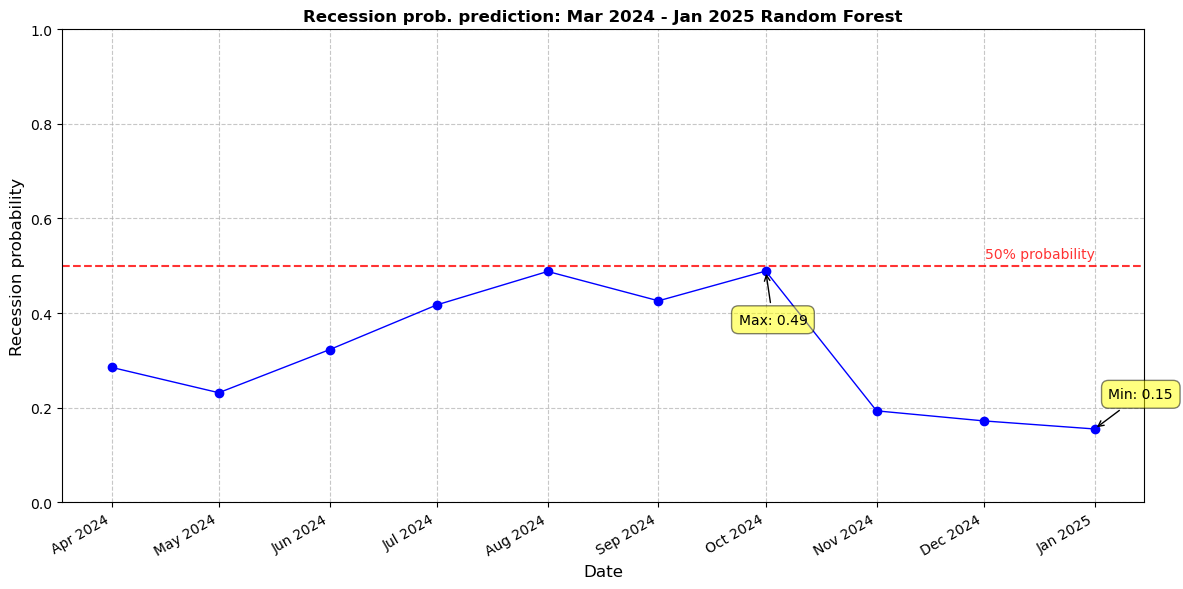

In [49]:
import matplotlib.dates as mdates

forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(forecast_df['Date'], forecast_df['Recession_Probability'], 
        color='blue', linewidth=1, marker='o')
ax.set_title('Recession prob. prediction: Mar 2024 - Jan 2025 Random Forest', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Recession probability', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.8) # add a horizontal line at 0.5 probability
ax.text(forecast_df['Date'].iloc[-1], 0.51, '50% probability', va='bottom', ha='right', color='r', alpha=0.8)
ax.set_ylim(0, 1)

max_prob = forecast_df['Recession_Probability'].max()
min_prob = forecast_df['Recession_Probability'].min()
max_date = forecast_df.loc[forecast_df['Recession_Probability'] == max_prob, 'Date'].iloc[0]
min_date = forecast_df.loc[forecast_df['Recession_Probability'] == min_prob, 'Date'].iloc[0]

ax.annotate(f'Max: {max_prob:.2f}', xy=(max_date, max_prob), xytext=(30, -30),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax.annotate(f'Min: {min_prob:.2f}', xy=(min_date, min_prob), xytext=(10, 30),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('RF_prediction.png')
plt.show();

### Cross validate time-series data with TimeSeriesSplit.

Method is designed for cross-validation with time series data. In time series data, observations are sequential and temporal order matters. Traditional cross-validation methods like K-Fold shuffle the data, which isn’t appropriate for time series because it can lead to training on future data to predict past data, causing data leakage.

In [50]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5) # split data in 5 ts chunks, each next chunk larger than previous, preserving t-s order
auc_scores = []

for train_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr) # apply SMOTE
    rf_model.fit(X_tr_resampled, y_tr_resampled) # train
    
    y_val_prob = rf_model.predict_proba(X_val)[:, 1] # evaluate
    auc = roc_auc_score(y_val, y_val_prob)
    auc_scores.append(auc)

print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC Score:", np.mean(auc_scores))

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=15,
                       random_state=55)

Cross-Validation AUC Scores: [0.9039451114922813, 0.8333333333333333, 0.9100478468899523, 0.9082568807339448, 0.8474770642201834]
Mean AUC Score: 0.880612047333939


### Conclusion

The Random Forest model performs much better than LR overall, especially in terms of precision for predicting recessions and non-recessions.
It has higher specificity -- 0.877 vs 0.598 in LogReg, and accuracy (0.86 vs 0.62 in Logreg), meaning it is particularly good at correctly identifying non-recession periods and making accurate predictions overall.

But: 

The recall for recessions is not very high (0.65), meaning it misses 35% of actual recession periods.

The prediction on forecast data generated with VAR while being significantly more "moderate", comparing to Log.reg. predictions, indicates the same risky periods with higher risks of the recession -- July - August plus October peak.

The model responded well to fine-tuning min_samples paramenters. It allowed to redice recall for Class 1 by almost twice.

We'll go over to the next model. 

---------------------------------------


## XGBoost

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier

In [52]:
# calc scaled possitive weights using SMOTEd data to give more importance to the target class 1 during training.
scale_pos_weight = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)

In [53]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_estimators = 1000,
    learning_rate=0.1,
    min_child_weight=10,
    colsample_bytree=0.9,
    gamma=0.9
)

In [54]:
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.9, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Evaluation

In [55]:
y_test_prob = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= 0.5).astype(int)

In [56]:
print("Classification report:")
print(classification_report(y_test, y_test_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

auc_score = roc_auc_score(y_test, y_test_prob)
print(f"\n\n\nXGBoost ROC AUC Score: {auc_score:.4f}")

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       187
         1.0       0.48      0.70      0.57        20

    accuracy                           0.90       207
   macro avg       0.72      0.81      0.76       207
weighted avg       0.92      0.90      0.91       207

Confusion matrix:
[[172  15]
 [  6  14]]



XGBoost ROC AUC Score: 0.8773


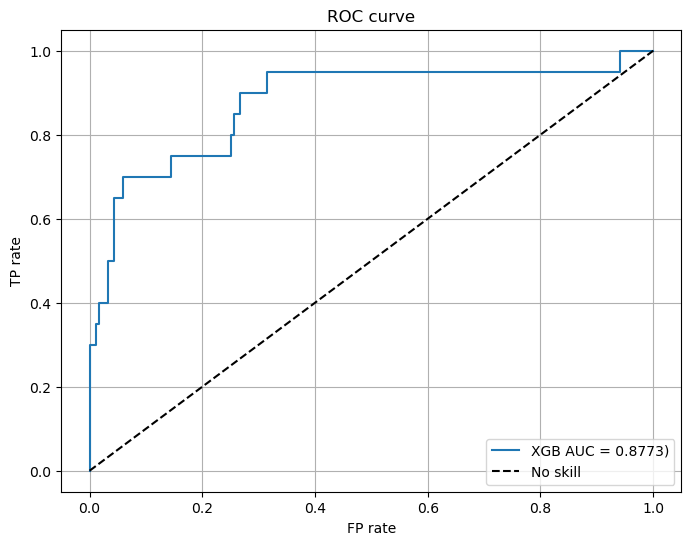

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGB AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No skill')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

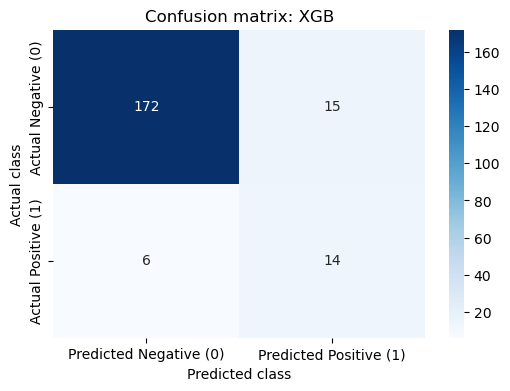

In [58]:
cm_x = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm_x, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix: XGB')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show();

### Predictions

In [59]:
forecast_pred_prob = xgb_model.predict_proba(forecast_features)[:, 1]

forecast_df['Recession_Probability'] = forecast_pred_prob # add the predictions to dataframe

In [60]:
forecast_df.head(12)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,...,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m,Recession_Probability
0,2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,...,119.440000,-0.020000,1376.000000,1.148757,1.382100,21.447900,1.671000,0.030910,0.030000,0.141060
1,2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,...,207.470000,0.020000,1546.000000,3.074212,8.447600,19.897100,1.909000,0.031530,0.030000,0.039245
2,2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,...,158.610000,0.000000,1299.000000,3.807592,7.173500,18.311700,2.006000,0.034770,0.030000,0.210351
3,2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,...,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392,0.385901
4,2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,...,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612,0.641033
5,2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,...,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626,0.834377
6,2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,...,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115,0.874282
7,2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,...,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906,0.142238
8,2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,...,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032,0.096627
9,2025-01-01,29.124193,0.594674,4.144975,0.146870,98.842415,15.246520,-0.025512,1410.939895,0.608150,...,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787,0.088325


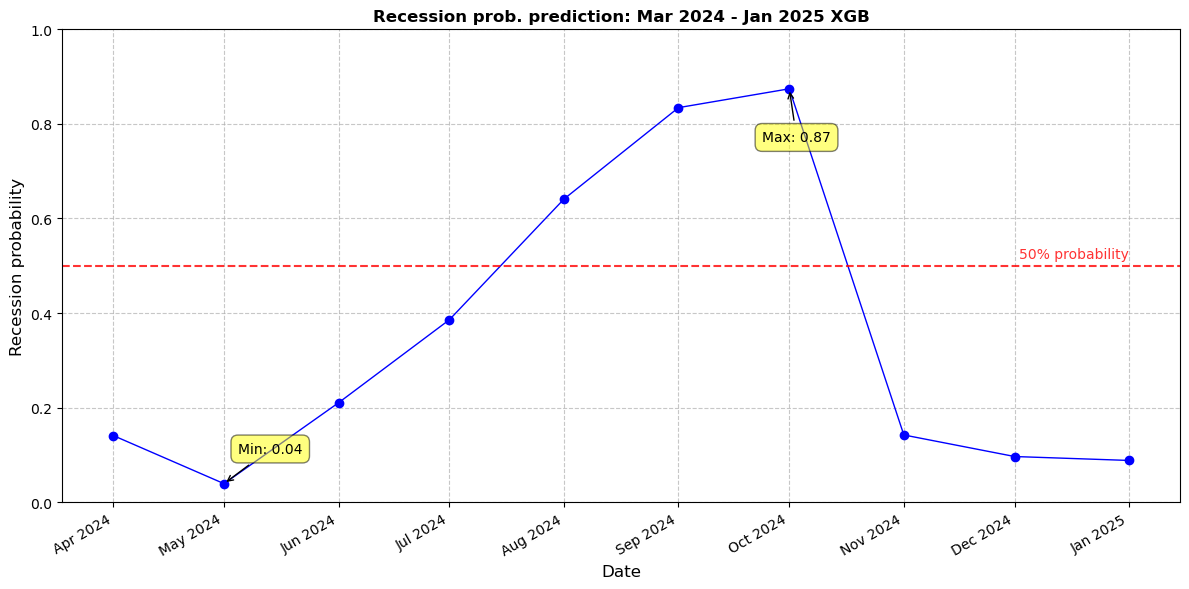

In [61]:
import matplotlib.dates as mdates

forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(forecast_df['Date'], forecast_df['Recession_Probability'], 
        color='blue', linewidth=1, marker='o')
ax.set_title('Recession prob. prediction: Mar 2024 - Jan 2025 XGB', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Recession probability', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.8) # add a horizontal line at 0.5 probability
ax.text(forecast_df['Date'].iloc[-1], 0.51, '50% probability', va='bottom', ha='right', color='r', alpha=0.8)
ax.set_ylim(0, 1)

max_prob = forecast_df['Recession_Probability'].max()
min_prob = forecast_df['Recession_Probability'].min()
max_date = forecast_df.loc[forecast_df['Recession_Probability'] == max_prob, 'Date'].iloc[0]
min_date = forecast_df.loc[forecast_df['Recession_Probability'] == min_prob, 'Date'].iloc[0]

ax.annotate(f'Max: {max_prob:.2f}', xy=(max_date, max_prob), xytext=(30, -30),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax.annotate(f'Min: {min_prob:.2f}', xy=(min_date, min_prob), xytext=(10, 30),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('XGB_prediction.png')
plt.show();

### Cross-validation w/ TimeseriesSplit

Same approach as before

In [62]:
tscv = TimeSeriesSplit(n_splits=5)
auc_scores = []

for train_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)
    
    scale_pos_weight = sum(y_tr_resampled == 0) / sum(y_tr_resampled == 1)
    
    xgb_model = XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )
    xgb_model.fit(X_tr_resampled, y_tr_resampled)

    y_val_prob = xgb_model.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_val_prob)
    auc_scores.append(auc)

print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC Score:", np.mean(auc_scores))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Cross-Validation AUC Scores: [0.9408233276157805, 0.845679012345679, 0.9028708133971293, 0.9254587155963302, 0.9461009174311926]
Mean AUC Score: 0.9121865572772222


#### Additional calculations

In [63]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importance)

Feature importances:
                         Feature  Importance
1                 GDP rate_lag3m    0.366425
9      Consumer loans_diff_lag3m    0.125532
11              CPI-U_diff_lag3m    0.059391
10     Mortgage loans_diff_lag3m    0.056297
7           Housing starts_lag3m    0.055686
12          Inflation rate_lag3m    0.052907
2             Unemployment_lag3m    0.052599
8   House price index_diff_lag3m    0.047599
13        World GDP growth_lag3m    0.041227
4                 DJI_diff_lag3m    0.038773
6              T-bill_diff_lag3m    0.036539
5               SP500_diff_lag3m    0.032255
3     Ind.Prod. index_diff_lag3m    0.022489
0                 GDP_diff_lag3m    0.012281


### Conclusion

For class 0:
- Precision: 97% of the periods predicted as non-recession are correct.
- Recall:92% of actual non-recession periods were correctly identified
- F1-score: the model performs well in identifying non-recession periods 94% identified correctly.

For class 1:
- Precision:only 48% of periods predicted as rec. were correct.
- Recall: 70% of actual recession periods were correctly identified, which is a strong improvement.
- F1-score: 0.57 balances precision and recall. Although the precision is low the F1 reflects a modest improvement.

Overall accuracy: 90% of the predictions of both classes -- are correct. This is quite good especially for imbalanced data where recessions are rare.

**Confusion matrix**

- TN: 172 non-recession periods were correctly identified as non-recession.
- FP: 15 non-recession periods were incorrectly predicted as recessions.
- Fn: 6 recession periods were incorrectly predicted as non-recession.
- TP: 14 recession periods were correctly identified as recessions.

**ROC AUC**

Score: 0.8773

ROC AUC score of 0.8773 suggests that the XGB mdel is able to distinguish between the two classes (recession vs non-recession) quite (very in fact) well.

**Cross validation results:**

- Scores: 0.9408, 0.8457, 0.9029, 0.9254, 0.9461
- Mean AUC: 0.9122

The cross-val. AUC scores demonstrate strong performance across different time folds. This supports the inference that the model is consistently good at distinguishing between recessions and non-recessions across multiple folds.

**Summary**

- XGBoost model indicates a considerable improvement comparing to RF model, not saying about LR.
- Cross-validation shows strong performance, with an average AUC score of 0.912, whach means that the model generalizes well.
- On the other hand XGB incorrectly classifies 15 non-recession periods as recessions. That's a lot of false alarms

In general, this result is not bad.

## SVM

In [64]:
from sklearn.svm import SVC

In [65]:
# linear
# svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
# svm_model.fit(X_train_resampled, y_train_resampled)

# rbf
svm_model_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42, C=9)
svm_model_rbf.fit(X_train_resampled, y_train_resampled)

SVC(C=9, class_weight='balanced', probability=True, random_state=42)

In [66]:
y_pred_svm = svm_model_rbf.predict(X_test) # p. labels
y_pred_prob_svm = svm_model_rbf.predict_proba(X_test)[:, 1]# predicted probabilities for class 1 (recession)

print("SVM Classification report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion matrix:")
print(confusion_matrix(y_test, y_pred_svm))

roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"SVM ROC AUC Score: {roc_auc_svm:.4f}")

SVM Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79       187
         1.0       0.21      0.80      0.33        20

    accuracy                           0.69       207
   macro avg       0.59      0.74      0.56       207
weighted avg       0.90      0.69      0.75       207

SVM Confusion matrix:
[[126  61]
 [  4  16]]
SVM ROC AUC Score: 0.7655


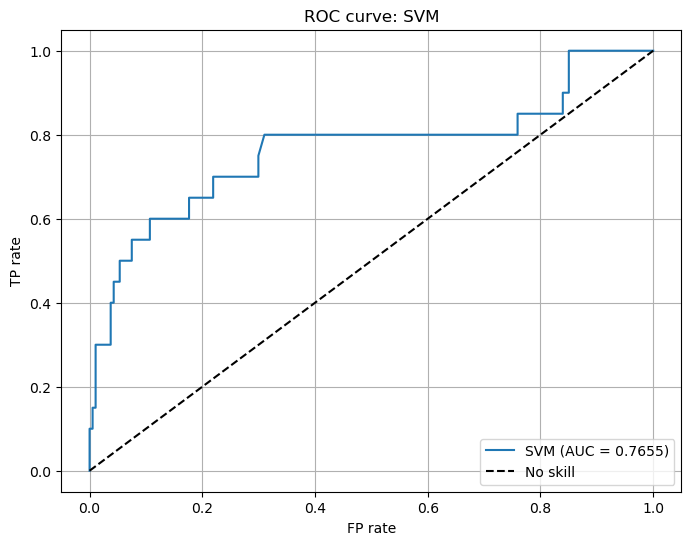

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No skill')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve: SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show();

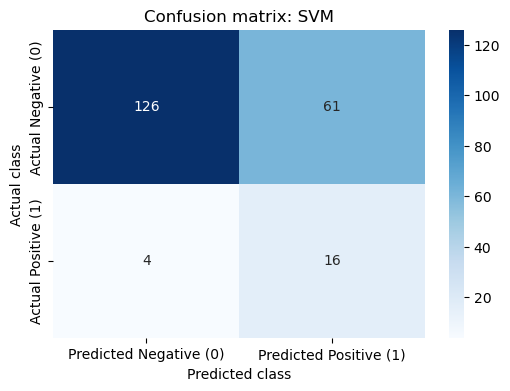

In [68]:
cm_x = confusion_matrix(y_test, y_pred_svm)

cm_df = pd.DataFrame(cm_x, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix: SVM')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show();

In [69]:
# columns_to_drop = ['DJI_diff_lag3m']
# forecast_features = forecast_df[lagged_feature_cols].drop(columns=columns_to_drop)
# forecast_features_scaled = scaler.transform(forecast_features)
forecast_pred_prob = svm_model_rbf.predict_proba(forecast_features)[:, 1]
forecast_df['Recession_Probability'] = forecast_pred_prob

In [70]:
forecast_df.head(12)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,...,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m,Recession_Probability
0,2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,...,119.440000,-0.020000,1376.000000,1.148757,1.382100,21.447900,1.671000,0.030910,0.030000,0.056198
1,2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,...,207.470000,0.020000,1546.000000,3.074212,8.447600,19.897100,1.909000,0.031530,0.030000,0.178464
2,2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,...,158.610000,0.000000,1299.000000,3.807592,7.173500,18.311700,2.006000,0.034770,0.030000,0.142278
3,2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,...,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392,0.632411
4,2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,...,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612,0.791105
5,2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,...,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626,0.404666
6,2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,...,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115,0.088102
7,2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,...,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906,0.054700
8,2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,...,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032,0.170573
9,2025-01-01,29.124193,0.594674,4.144975,0.146870,98.842415,15.246520,-0.025512,1410.939895,0.608150,...,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787,0.210436


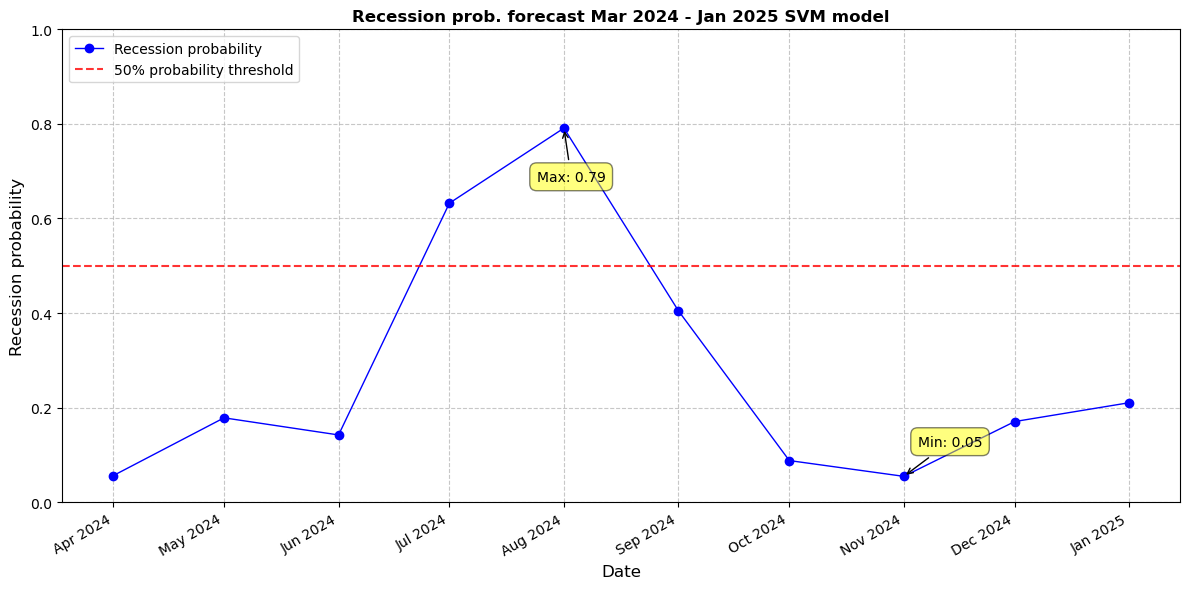

In [71]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forecast_df['Date'], forecast_df['Recession_Probability'], color='blue', linewidth=1, marker='o', label='Recession probability')
ax.set_title('Recession prob. forecast Mar 2024 - Jan 2025 SVM model', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Recession probability', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
ax.grid(True, linestyle='--', alpha=0.7)

ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.8, label='50% probability threshold')
max_prob = forecast_df['Recession_Probability'].max()
min_prob = forecast_df['Recession_Probability'].min()
max_date = forecast_df.loc[forecast_df['Recession_Probability'] == max_prob, 'Date'].iloc[0]
min_date = forecast_df.loc[forecast_df['Recession_Probability'] == min_prob, 'Date'].iloc[0]
ax.annotate(f'Max: {max_prob:.2f}', xy=(max_date, max_prob), xytext=(30, -30),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax.annotate(f'Min: {min_prob:.2f}', xy=(min_date, min_prob), xytext=(10, 30),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax.set_ylim(0, 1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig('SVM_prediction.png')
plt.show();

### Conclusions

Precision:
- Class 0 precision = 0.97 meaning that when the model predicts no recession (class 0), it’s correct 97% of the time.
- Class 1 precision is 0.21, meaning when the model predicts a recession it’s correct only 21% of the time. Again, a lot of false alarms.

Recall:
- Class 0: 0.67, meaning the model correctly identifies 67% of the non-recession periods. Model misses a significant number of non-recession periods.
- Class 1 recall -- 0.8, meaning the model correctly identifies 80% of the actual recessions, missing 1 of 5, which is decent for such a rare event.

F1-Score:
- Class 0:  0.79 indicating that the model performs moderately well at identifying non-recession periods.
- Class 1:  0.33, which is quite low, indicating that the model struggles to balance precision and recall for identifying recessions.

Accuracy: 0.69 -- the model is correct 69% of the time. The relatively low accuracy is due to the high number of false positives.

Confusion Matrix: the model is predicting many false positives for recessions (84 cases), while missing some true recessions (7 cases), which explains the low precision for class 1.

ROC AUC Score 0.7655 is reasonable. However, it’s slightly lower than some of the previous models like Random Forest and XGBoost.

The major issue here and with the models above is the rarity of target event. Even SMOTE struggles with imbalanceness, each model generates lots of false alarms.

## Ensemble technique

We'll try to use strong sides of these models to use 'em in voting classifier.

In [72]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [73]:
negative_class_count = sum(y_train_resampled == 0)  # class 0 count
positive_class_count = sum(y_train_resampled == 1)  # class 1, recessions count

scale_pos_weight = negative_class_count / positive_class_count

In [74]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, C=0.009)
svm_model = svm_model_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42, C=9)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=55,
    min_samples_split=15,
    min_samples_leaf=30
)
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_estimators = 1000,
    learning_rate=0.1,
    min_child_weight=10,
    colsample_bytree=0.9,
    gamma=0.9
)

voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm', svm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

In [75]:
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred_prob_ensemble = voting_clf.predict_proba(X_test)[:, 1]

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=0.009,
                                                 class_weight='balanced',
                                                 max_iter=1000)),
                             ('svm',
                              SVC(C=9, class_weight='balanced',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(min_samples_leaf=30,
                                                     min_samples_split=15,
                                                     random_state=55)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_byleve...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=10, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [76]:
y_pred_ensemble = (y_pred_prob_ensemble >= 0.5).astype(int)

print("Classification report:")
print(classification_report(y_test, y_pred_ensemble))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

roc_auc_ensemble = roc_auc_score(y_test, y_pred_prob_ensemble)
print(f"Ensemble ROC-AUC Score: {roc_auc_ensemble:.4f}")

Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90       187
         1.0       0.35      0.80      0.48        20

    accuracy                           0.84       207
   macro avg       0.66      0.82      0.69       207
weighted avg       0.91      0.84      0.86       207

Confusion matrix:
[[157  30]
 [  4  16]]
Ensemble ROC-AUC Score: 0.8350


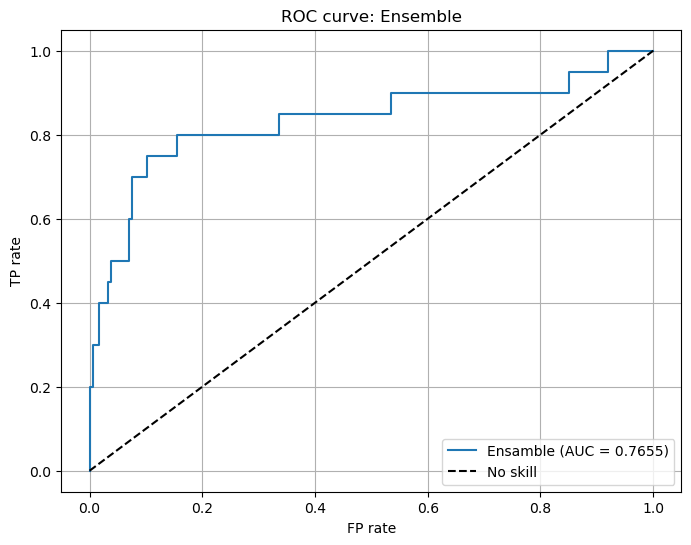

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ensemble)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensamble (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No skill')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve: Ensemble')
plt.legend(loc='lower right')
plt.grid()
plt.show();

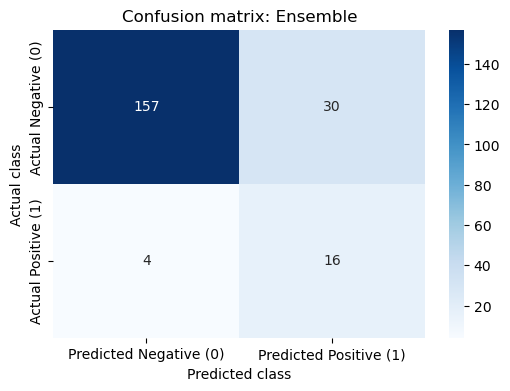

In [78]:
cm_x = confusion_matrix(y_test, y_pred_ensemble)

cm_df = pd.DataFrame(cm_x, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix: Ensemble')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show();

Class 0:
- Precision 0.98: well, the Ensemble is very good at predicting non-recession periods.
- Recall 0.84 : the model correctly identifies 84% of actual non-recession periods. However, 16% of NR periods were misclassified as recessions (FPs).
- F1-Score 0.9: the balance b/w precision and recall for class 0 is quite strong.

Class 1:
- Precision 0.35 means that when the model predicts a recession, it is only correct 35% of the time.
- Recall 0.8: the model is able to capture 80% of actual recessions.
- F1-Score 0.48.

- TN 157: the model correctly identified 157 non-recession periods.
- FP 30: ensemble incorrectly predict 30 recession periods that were actually non-recession periods.
- TP 4: the model correctly identified 4 recession periods.
- FN 16: the model missed 16 actual recession periods.

**Accuracy**:
The overall accuracy is 84%. The model is correct 84% of the time, a strong result.

**Roc AUC**:

The ROC AUC score 0.835. This is a good score, indicating the Ensemble has solid discriminatory power between recession and non-recession periods. It’s in line with the performance of other models.

In [79]:
columns_to_drop = ['DJI_diff_lag3m']
# forecast_features = forecast_df[lagged_feature_cols].drop(columns=columns_to_drop)

# forecast_features_scaled = scaler.transform(forecast_features)
forecast_pred_prob = voting_clf.predict_proba(forecast_features)[:, 1]
forecast_df['Recession_Probability'] = forecast_pred_prob

In [80]:
forecast_df.head(12)

,Date,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,...,SP500_diff_lag3m,T-bill_diff_lag3m,Housing starts_lag3m,House price index_diff_lag3m,Consumer loans_diff_lag3m,Mortgage loans_diff_lag3m,CPI-U_diff_lag3m,Inflation rate_lag3m,World GDP growth_lag3m,Recession_Probability
0,2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,...,119.440000,-0.020000,1376.000000,1.148757,1.382100,21.447900,1.671000,0.030910,0.030000,0.129219
1,2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,...,207.470000,0.020000,1546.000000,3.074212,8.447600,19.897100,1.909000,0.031530,0.030000,0.112678
2,2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,...,158.610000,0.000000,1299.000000,3.807592,7.173500,18.311700,2.006000,0.034770,0.030000,0.169530
3,2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,...,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392,0.400364
4,2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,...,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612,0.593136
5,2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,...,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626,0.492605
6,2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,...,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115,0.386568
7,2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,...,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906,0.109941
8,2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,...,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032,0.132186
9,2025-01-01,29.124193,0.594674,4.144975,0.146870,98.842415,15.246520,-0.025512,1410.939895,0.608150,...,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787,0.143132


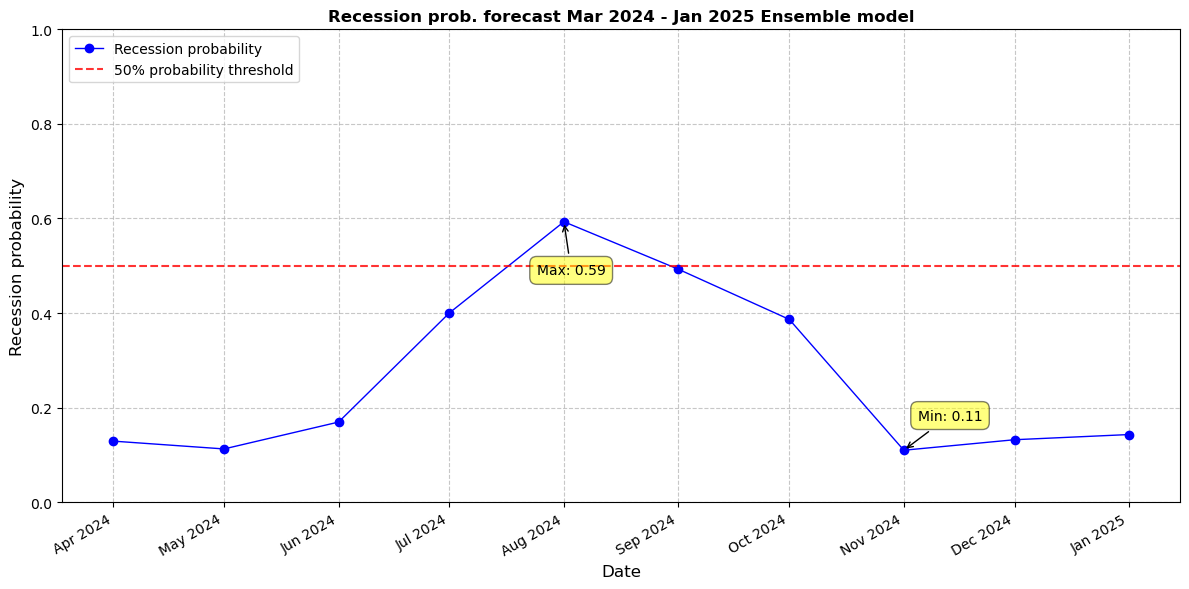

In [81]:
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forecast_df['Date'], forecast_df['Recession_Probability'], color='blue', linewidth=1, marker='o', label='Recession probability')
ax.set_title('Recession prob. forecast Mar 2024 - Jan 2025 Ensemble model', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Recession probability', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
ax.grid(True, linestyle='--', alpha=0.7)

ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.8, label='50% probability threshold')
max_prob = forecast_df['Recession_Probability'].max()
min_prob = forecast_df['Recession_Probability'].min()
max_date = forecast_df.loc[forecast_df['Recession_Probability'] == max_prob, 'Date'].iloc[0]
min_date = forecast_df.loc[forecast_df['Recession_Probability'] == min_prob, 'Date'].iloc[0]
ax.annotate(f'Max: {max_prob:.2f}', xy=(max_date, max_prob), xytext=(30, -30),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax.annotate(f'Min: {min_prob:.2f}', xy=(min_date, min_prob), xytext=(10, 30),
            textcoords='offset points', ha='left', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax.set_ylim(0, 1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig('Ensemble_prediction.png')
plt.show();

All models show the peak of probability of recession was in July - August.